## Generating Synthetic Dataset for pattern recognition

In [10]:
import numpy as np
import pandas as pd
from datetime import datetime, timedelta
from sklearn.preprocessing import MinMaxScaler

# Set seed for reproducibility
np.random.seed(42)

# Function to generate random timestamps for a given day and time range
def generate_random_timestamps(day, start_time, end_time, num_samples):
    start_timestamp = datetime.combine(day, start_time).timestamp() * 1000  # Convert to milliseconds
    end_timestamp = datetime.combine(day, end_time).timestamp() * 1000
    # Ensure that start_timestamp is less than end_timestamp
    start_timestamp, end_timestamp = min(start_timestamp, end_timestamp), max(start_timestamp, end_timestamp)
    return np.random.randint(start_timestamp, end_timestamp + 1, num_samples)

# Function to choose a random time range based on weekday routine
def choose_time_range():
    weekday_time_ranges = [
        (datetime.strptime('6:00', '%H:%M').time(), datetime.strptime('11:00', '%H:%M').time()),
        (datetime.strptime('11:00', '%H:%M').time(), datetime.strptime('15:00', '%H:%M').time()),
        (datetime.strptime('15:00', '%H:%M').time(), datetime.strptime('19:00', '%H:%M').time()),
        (datetime.strptime('19:00', '%H:%M').time(), datetime.strptime('01:00', '%H:%M').time()),
        (datetime.strptime('22:00', '%H:%M').time(), datetime.strptime('01:00', '%H:%M').time())
    ]
    selected_time_range = np.random.choice(len(weekday_time_ranges))
    return weekday_time_ranges[selected_time_range][0], weekday_time_ranges[selected_time_range][1]

# Function to simulate device usage based on weather conditions and room type
def use_device_with_default(device, room_name):
    default_value = 'Off'  # Set a default value, you can change it as needed
    if device == 'Light':
        if room_name in ['Bedroom', 'Bathroom']:
            return np.random.choice(['Off', 'On'], p=[0.8, 0.2])
        else:
            return np.random.choice(['Off', 'On'], p=[0.3, 0.7])
    elif device == 'Thermostat':
        return np.random.choice(['Off', 'On'], p=[0.5, 0.5])  # Both 'On' and 'Off' states
    elif device == 'Smartlock':
        return np.random.choice(['Locked', 'Unlocked'], p=[0.1, 0.9])
    elif device == 'SmartBlinds':
        return np.random.choice(['Closed', 'Open'], p=[0.4, 0.6])
    elif device == 'WaterHeater':
        return np.random.choice(['Off', 'On'], p=[0.9, 0.1])
    elif device == 'SmartKettle':
        return np.random.choice(['Off', 'On'], p=[0.7, 0.3])
    elif device == 'SmartTV':
        return np.random.choice(['Off', 'On'], p=[0.5, 0.5])
    else:
        return default_value  # Set default value for unknown devices

# Function to simulate weather conditions
def simulate_weather():
    weather_conditions = ['Sunny', 'Light Rain', 'Heavy Rain', 'Windy', 'Stormy', 'Cloudy', 'Partly Cloudy']
    return np.random.choice(weather_conditions)

# Function to determine activity based on room type
def determine_activity(room_name):
    if room_name == 'Bedroom':
        return 'Sleeping'
    elif room_name == 'Bathroom':
        return 'Bathing'
    elif room_name == 'LivingRoom':
        return np.random.choice(['Watching TV', 'Reading', 'Relaxing'])
    elif room_name == 'Kitchen':
        return 'Cooking'
    elif room_name == 'Outdoor':
        return np.random.choice(['Playing', 'Gardening', 'Outdoor Relaxation'])

# Function to create synthetic dataset with fixed 'PowerStatus' logic
def create_synthetic_dataset(num_samples):
    room_devices = {
        'Bedroom': ['Light', 'SmartBlinds', 'Thermostat'],
        'Bathroom': ['Light', 'WaterHeater'],
        'LivingRoom': ['Light', 'SmartTV', 'SmartBlinds', 'Thermostat', 'Smartlock'],
        'Kitchen': ['Light', 'SmartKettle'],
        'Outdoor': ['Light', 'SmartDoor']
    }

    # Initialize empty lists to store data
    device_names = []
    timestamps = []
    activities = []  # New column for activities
    room_names = []
    power_status = []
    weather_conditions = []  # New column for weather conditions
    week_days = []  # New column for weekdays
    user_ids = []  # New column for user IDs

    # Generate synthetic data
    for _ in range(num_samples):
        # Randomly select a room
        room_name = np.random.choice(list(room_devices.keys()))

        # Randomly select a device from the specified devices for the room
        device = np.random.choice(room_devices[room_name])

        # Randomly select a timestamp within the specified start and end date
        start_date = datetime(2024, 1, 1)
        end_date = datetime(2024, 2, 15)

        # Ensure the day selected is Between Monday to Friday
        day = np.random.choice(pd.date_range(start_date, end_date).date)
        while day.strftime('%A') not in ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday']:
            day = np.random.choice(pd.date_range(start_date, end_date).date)

        start_time, end_time = choose_time_range()
        timestamp = generate_random_timestamps(day, start_time, end_time, 1)[0]

        # Use devices based on weather conditions and room type
        power_status_value = use_device_with_default(device, room_name)

        # Determine activity based on room type
        activity = determine_activity(room_name)

        # Append data to lists
        device_names.append(device)
        timestamps.append(timestamp)
        activities.append(activity)
        room_names.append(room_name)
        power_status.append(power_status_value)
        weather_conditions.append(simulate_weather())
        week_days.append(day.strftime('%A'))  # Get the day of the week
        user_ids.append('243jfejt948er9')  # Set a constant user ID

    # Create synthetic dataset
    synthetic_data = pd.DataFrame({
        'DeviceName': device_names,
        'Weather': weather_conditions,
        'Timestamp': timestamps,
        'Activity': activities,
        'RoomName': room_names,
        'PowerStatus': power_status,
        'Week': week_days,
        'UserId': user_ids
    })

    return synthetic_data

# Specify the number of samples
num_samples = 10000

# Create synthetic dataset
synthetic_dataset = create_synthetic_dataset(num_samples)

# Sort the dataset by timestamp
synthetic_dataset = synthetic_dataset.sort_values(by='Timestamp')

# Print the first few rows of the dataset
print("Generated User Pattern Dataset:")
print(synthetic_dataset.head())

# Save the dataset to a CSV file
synthetic_dataset.to_csv('user_pattern_weekday_dataset_modified.csv', index=False)

print("User pattern dataset saved to 'user_pattern_weekday_dataset_modified.csv'")


Generated User Pattern Dataset:
       DeviceName        Weather      Timestamp            Activity  RoomName  \
3893        Light         Stormy  1704051996442             Bathing  Bathroom   
1301  SmartBlinds          Windy  1704052000294            Sleeping   Bedroom   
8501        Light     Light Rain  1704052627013  Outdoor Relaxation   Outdoor   
5408  SmartKettle          Windy  1704052698638             Cooking   Kitchen   
1075        Light  Partly Cloudy  1704052872154           Gardening   Outdoor   

     PowerStatus    Week          UserId  
3893         Off  Monday  243jfejt948er9  
1301        Open  Monday  243jfejt948er9  
8501         Off  Monday  243jfejt948er9  
5408         Off  Monday  243jfejt948er9  
1075          On  Monday  243jfejt948er9  
User pattern dataset saved to 'user_pattern_weekday_dataset_modified.csv'


## Exploratory Data Analysis

## Load the Dataset:



In [11]:
import pandas as pd

# Load the dataset
synthetic_dataset = pd.read_csv('user_pattern_weekday_dataset_modified.csv')


## Overview of the Dataset:



In [12]:
print(synthetic_dataset.head())


    DeviceName        Weather      Timestamp            Activity  RoomName  \
0        Light         Stormy  1704051996442             Bathing  Bathroom   
1  SmartBlinds          Windy  1704052000294            Sleeping   Bedroom   
2        Light     Light Rain  1704052627013  Outdoor Relaxation   Outdoor   
3  SmartKettle          Windy  1704052698638             Cooking   Kitchen   
4        Light  Partly Cloudy  1704052872154           Gardening   Outdoor   

  PowerStatus    Week          UserId  
0         Off  Monday  243jfejt948er9  
1        Open  Monday  243jfejt948er9  
2         Off  Monday  243jfejt948er9  
3         Off  Monday  243jfejt948er9  
4          On  Monday  243jfejt948er9  


## Data Summary:

In [13]:
print(synthetic_dataset.describe())


          Timestamp
count  1.000000e+04
mean   1.706026e+12
std    1.181227e+09
min    1.704052e+12
25%    1.704961e+12
50%    1.706015e+12
75%    1.707118e+12
max    1.708014e+12


## Data Types:



In [14]:
print(synthetic_dataset.dtypes)


DeviceName     object
Weather        object
Timestamp       int64
Activity       object
RoomName       object
PowerStatus    object
Week           object
UserId         object
dtype: object


## Missing Values:

In [15]:
print(synthetic_dataset.isnull().sum())


DeviceName     0
Weather        0
Timestamp      0
Activity       0
RoomName       0
PowerStatus    0
Week           0
UserId         0
dtype: int64


### Distribution of Categorical Variables:

Visualize the distribution of categorical variables like DeviceName, Weather, Activity, and RoomName using bar plots:

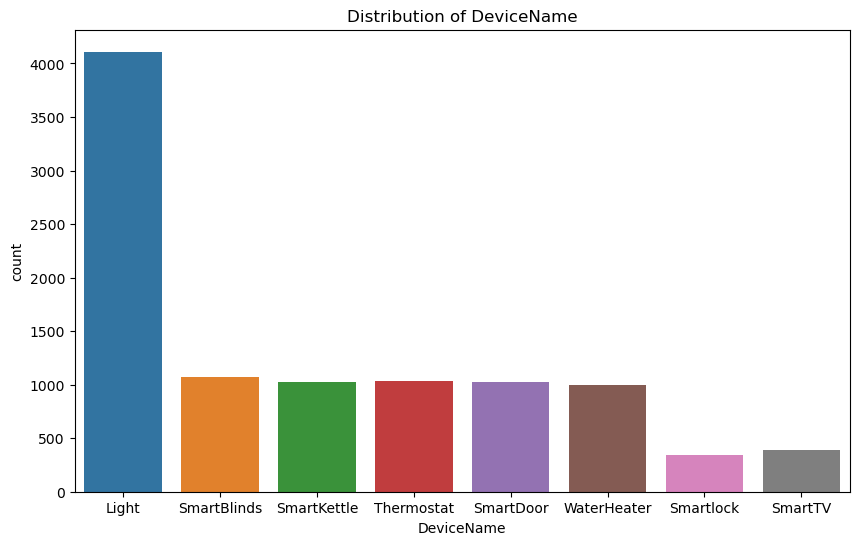

In [16]:
import matplotlib.pyplot as plt
import seaborn as sns

# Example for 'DeviceName'
plt.figure(figsize=(10, 6))
sns.countplot(x='DeviceName', data=synthetic_dataset)
plt.title('Distribution of DeviceName')
plt.show()


## Time Series Analysis:
Explore the patterns over time. Plot the device usage or activities over time:


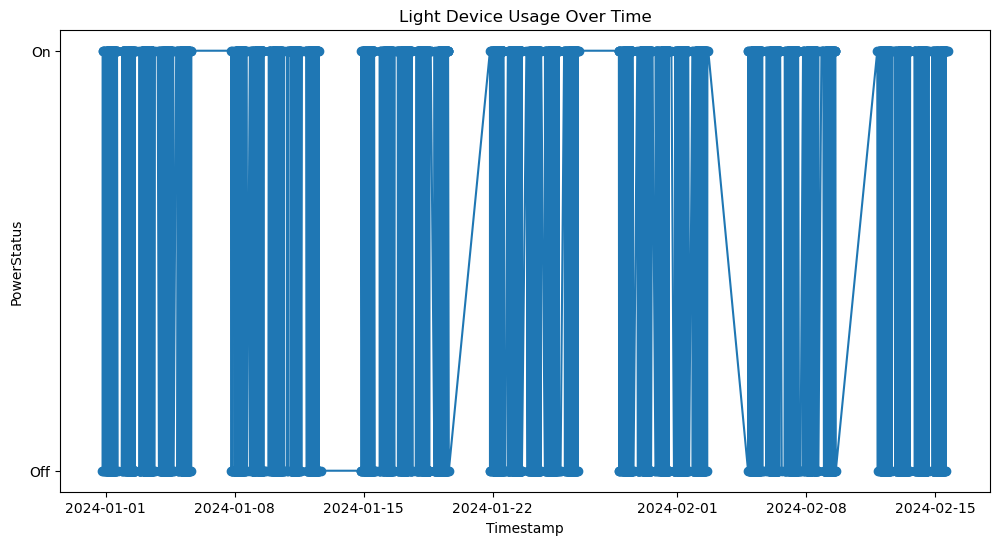

In [17]:
# Convert timestamp to datetime
synthetic_dataset['Timestamp'] = pd.to_datetime(synthetic_dataset['Timestamp'], unit='ms')

# Example for 'Light' device
plt.figure(figsize=(12, 6))
plt.plot(synthetic_dataset[synthetic_dataset['DeviceName'] == 'Light']['Timestamp'],
         synthetic_dataset[synthetic_dataset['DeviceName'] == 'Light']['PowerStatus'], marker='o')
plt.title('Light Device Usage Over Time')
plt.xlabel('Timestamp')
plt.ylabel('PowerStatus')
plt.show()


## Grouped Analysis:

Explore patterns by grouping the data. For example, explore device usage by room or activity:


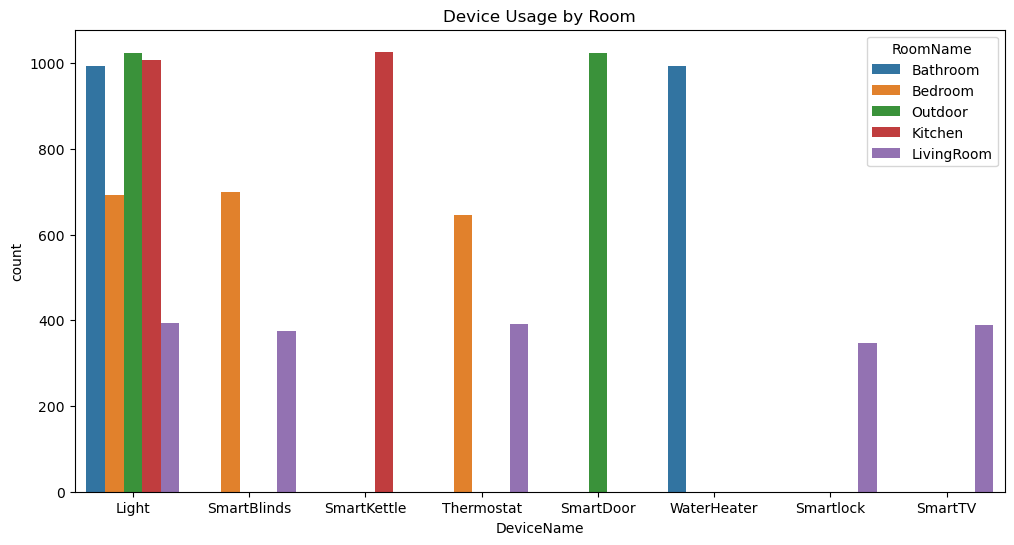

In [19]:
# Example for device usage by room
plt.figure(figsize=(12, 6))
sns.countplot(x='DeviceName', hue='RoomName', data=synthetic_dataset)
plt.title('Device Usage by Room')
plt.show()


## User-specific Analysis:

If you generated data for multiple users, consider analyzing user-specific patterns:

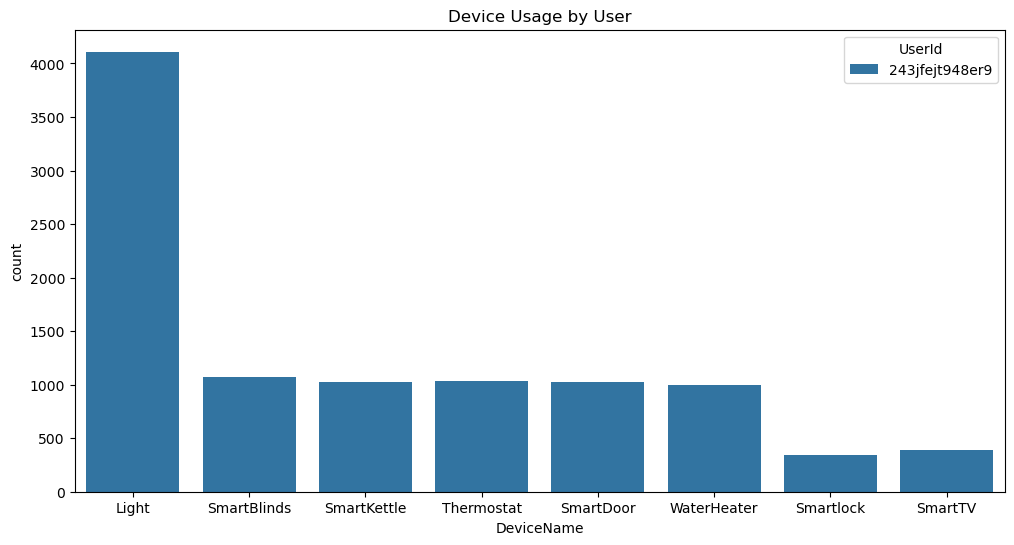

In [20]:
# Example for device usage by user
plt.figure(figsize=(12, 6))
sns.countplot(x='DeviceName', hue='UserId', data=synthetic_dataset)
plt.title('Device Usage by User')
plt.show()


## Dataset Distribution 

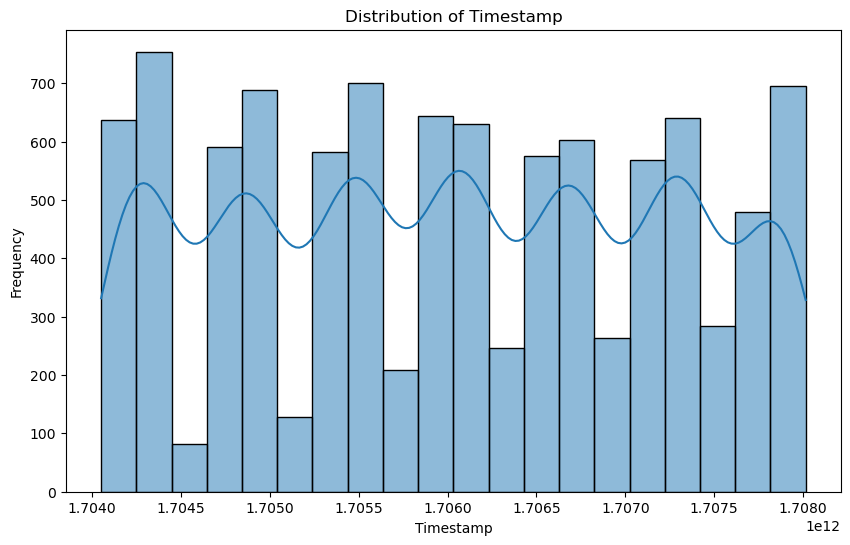

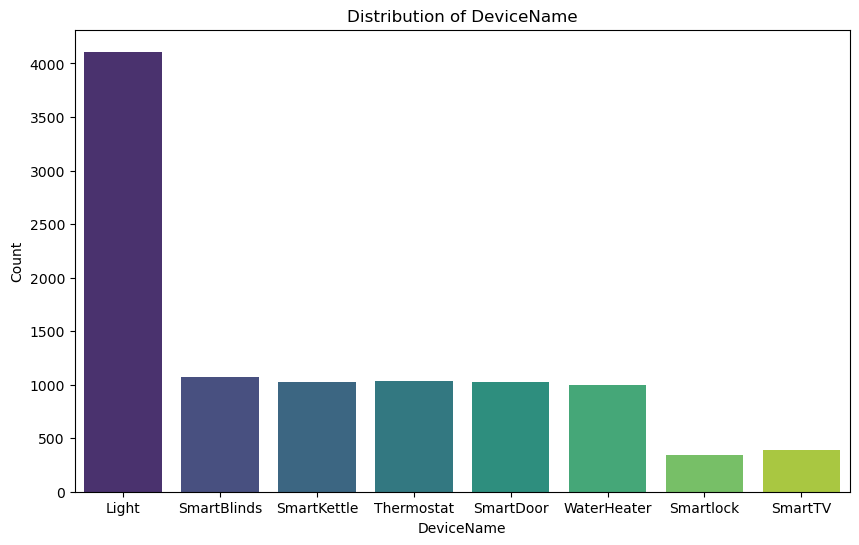

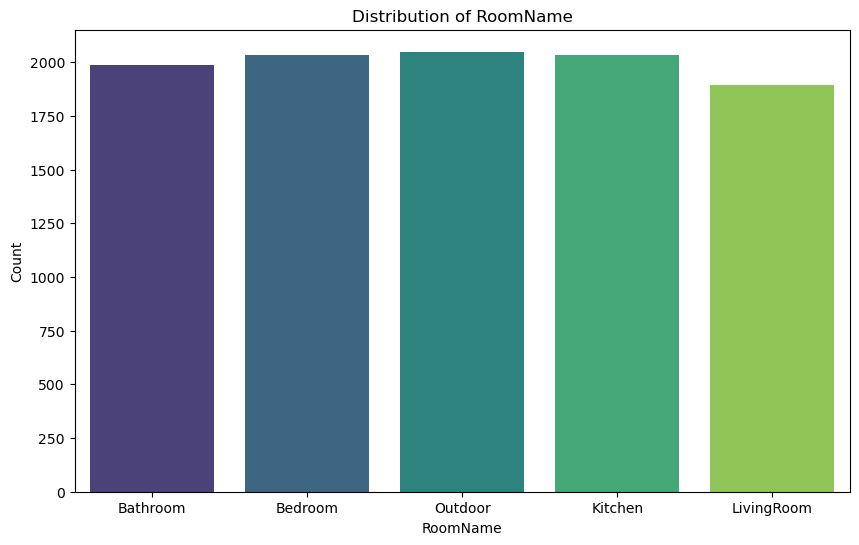

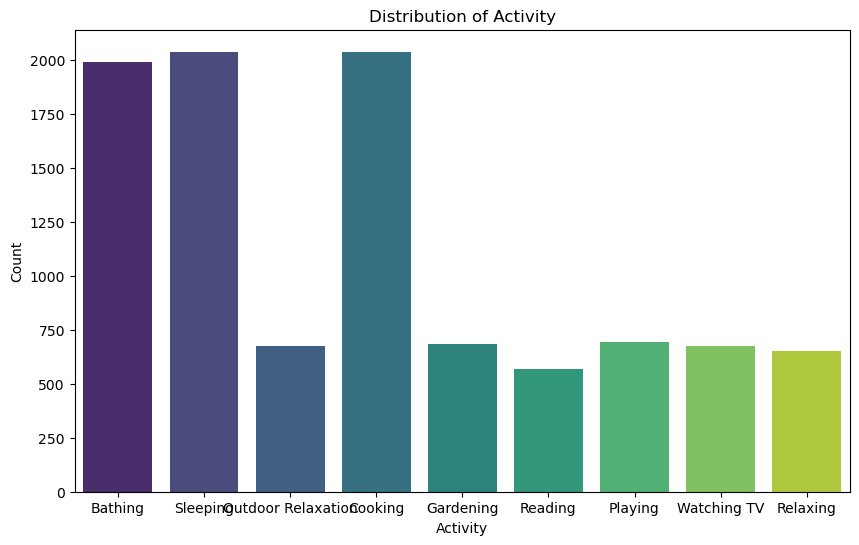

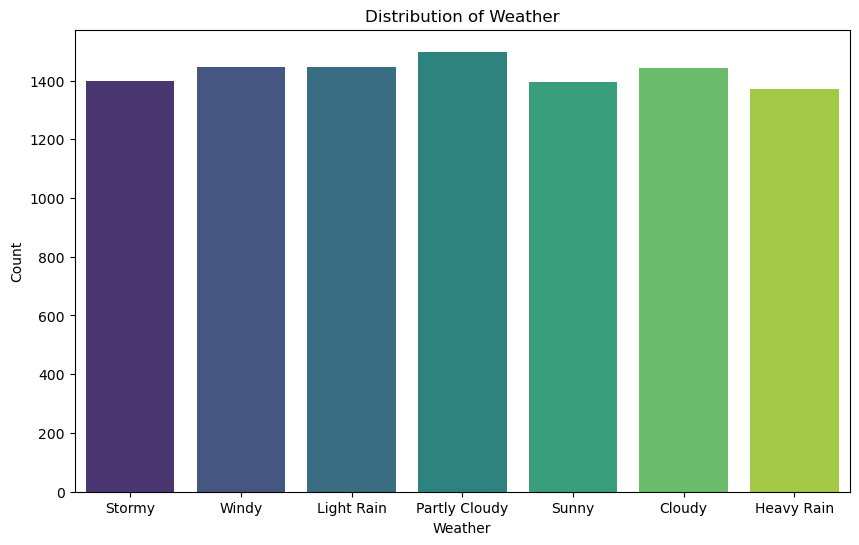

In [21]:
import matplotlib.pyplot as plt
import seaborn as sns

# Load the synthetic dataset
synthetic_dataset = pd.read_csv('user_pattern_weekday_dataset_modified.csv')

# Plot the distribution of numerical features
numerical_features = ['Timestamp']
for feature in numerical_features:
    plt.figure(figsize=(10, 6))
    sns.histplot(synthetic_dataset[feature], kde=True)
    plt.title(f'Distribution of {feature}')
    plt.xlabel(feature)
    plt.ylabel('Frequency')
    plt.show()

# Plot the distribution of categorical features
categorical_features = ['DeviceName', 'RoomName', 'Activity', 'Weather']
for feature in categorical_features:
    plt.figure(figsize=(10, 6))
    sns.countplot(x=feature, data=synthetic_dataset, palette='viridis')
    plt.title(f'Distribution of {feature}')
    plt.xlabel(feature)
    plt.ylabel('Count')
    plt.show()


### Predict Device Power Status:

Algorithm: Classification algorithms such as Random Forest, Decision Trees, or Support Vector Machines (SVM).
Target Variable: PowerStatus (On/Off).

### Predict User Activity:

Algorithm: Classification algorithms like Random Forest, Decision Trees, or SVM.
Target Variable: Activity (Sleeping, Bathing, Watching TV, Cooking, Playing, etc.).

### Time Series Forecasting:

Algorithm: Time series forecasting algorithms like LSTM (Long Short-Term Memory) for predicting future device usage patterns based on historical data.
Target Variable: PowerStatus or Activity over time.

### Clustering User Behavior:

Algorithm: K-Means Clustering or DBSCAN.
Target Variable: You may not necessarily need a target variable for clustering. Use features like DeviceName, Weather, and Timestamp.


### Anomaly Detection:

Algorithm: Isolation Forest, One-Class SVM, or Autoencoders.
Target Variable: Identify unusual or unexpected patterns in device usage.


### Predictive Maintenance:

Algorithm: Regression models like Linear Regression, Decision Trees, or Random Forest to predict device failure or maintenance needs.
Target Variable: Timestamp until the next maintenance event.

## Random Forest classifier to predict the user activity based on available features:

In [22]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report

# Convert datetime to Unix timestamp in milliseconds
synthetic_dataset['Timestamp'] = synthetic_dataset['Timestamp'].astype(int) // 10**6

# Features and target variable
features = ['DeviceName', 'Weather', 'Timestamp', 'RoomName', 'PowerStatus']
target = 'Activity'

# Convert categorical features to numerical using one-hot encoding
X = pd.get_dummies(synthetic_dataset[features], drop_first=True)
y = synthetic_dataset[target]

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train a Random Forest classifier
rf_classifier = RandomForestClassifier(n_estimators=100, random_state=42)
rf_classifier.fit(X_train, y_train)

# Predict on the test set
y_pred = rf_classifier.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy:.2f}")

# Display classification report
print("Classification Report:")
print(classification_report(y_test, y_pred))


Accuracy: 0.75
Classification Report:
                    precision    recall  f1-score   support

           Bathing       1.00      1.00      1.00       413
           Cooking       1.00      1.00      1.00       428
         Gardening       0.39      0.40      0.40       133
Outdoor Relaxation       0.38      0.34      0.36       129
           Playing       0.29      0.31      0.30       131
           Reading       0.31      0.28      0.30       113
          Relaxing       0.39      0.40      0.40       136
          Sleeping       1.00      1.00      1.00       404
       Watching TV       0.33      0.35      0.34       113

          accuracy                           0.75      2000
         macro avg       0.57      0.57      0.57      2000
      weighted avg       0.75      0.75      0.75      2000



## Applying Other classification algorithms

- Logistic Regression
- Support Vector Machines (SVM)
- K-Nearest Neighbors (KNN)
- Decision Trees
- Gradient Boosting (e.g., XGBoost, LightGBM)

## Applying Recommender System using cosine similarity

In [25]:
import pandas as pd
from sklearn.metrics.pairwise import cosine_similarity
from sklearn.preprocessing import LabelEncoder

# Load the synthetic dataset
synthetic_dataset = pd.read_csv('user_pattern_weekday_dataset_modified.csv')

# Encode categorical variables
label_encoder = LabelEncoder()
synthetic_dataset['DeviceName'] = label_encoder.fit_transform(synthetic_dataset['DeviceName'])
synthetic_dataset['RoomName'] = label_encoder.fit_transform(synthetic_dataset['RoomName'])
synthetic_dataset['Activity'] = label_encoder.fit_transform(synthetic_dataset['Activity'])
synthetic_dataset['Weather'] = label_encoder.fit_transform(synthetic_dataset['Weather'])

# Create a user-device matrix
user_device_matrix = synthetic_dataset.pivot_table(index='RoomName', columns='DeviceName', values='PowerStatus', aggfunc='count', fill_value=0)

# Calculate cosine similarity between users
user_similarity = cosine_similarity(user_device_matrix)

# Convert similarity matrix to DataFrame
user_similarity_df = pd.DataFrame(user_similarity, index=user_device_matrix.index, columns=user_device_matrix.index)

# Function to recommend devices based on user's activity
def recommend_devices(user_id, activity, top_n=3):
    # Get the user's row from the similarity matrix
    user_row = user_similarity_df.loc[user_id]

    # Find users most similar to the target user for the given activity
    similar_users = user_row.sort_values(ascending=False).index[1:]

    # Get the devices used by similar users for the given activity
    similar_users_devices = synthetic_dataset[(synthetic_dataset['RoomName'].isin(similar_users)) & (synthetic_dataset['Activity'] == activity)]['DeviceName']

    # Count the occurrences of each device and recommend the top N
    recommended_devices = similar_users_devices.value_counts().head(top_n).index.tolist()

    # Decode device names
    recommended_devices = label_encoder.inverse_transform(recommended_devices)

    return recommended_devices

# Example: Recommend devices for a user (user_id=0) during the activity 'Watching TV'
recommended_devices = recommend_devices(user_id=0, activity='Cooking')
print(f"Recommended Devices: {recommended_devices}")


Recommended Devices: []
